# TP 3: Support Vector Machines (SVM) & kernel methods

In this tutorial, we will try to predict the species of a penguin from its physical characteristics using support vector machines (SVM).

For this we will use the *palmerpenguins* dataset, an alternative to the now classic *iris* of scikit-learn. It contains the characteristics of three species of penguins found on the Palmer Archipelago, off the northwest coast of the Antarctic Peninsula.

For more information, you can visit the website: https://allisonhorst.github.io/palmerpenguins/index.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas

## I- Importing data

### 1) with pip
To install the package to access the data: **pip install palmerpenguins**

In [3]:
from palmerpenguins import load_penguins
penguins = load_penguins()

### 2) in csv format
If you do not have *pip* and cannot download the package in any other way, you have the data in .csv format in moodle.

In [4]:
import pandas as pd
palmerpenguins = pd.read_csv("palmerpenguins_data.csv")

## II- Dataset description 

In [5]:
palmerpenguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
import collections
print(palmerpenguins.shape)
print(collections.Counter(palmerpenguins.species))

(344, 8)
Counter({'Adelie': 152, 'Gentoo': 124, 'Chinstrap': 68})


**344** penguins with **8** attributes:
- *species*: Adelie (152 penguins), Gentoo (124 penguins) and Ginstrap (68 penguins)
- *island* (the census island): Biscoe, Dream and Torgersen
- *bill_length_mm*: length of the bill in mm
- *bil_depth_mm*: width of the bill in mm
- *flipper_length_mm*: width of flippers in mm
- *body_mass_g*: weight in g
- *sex*: male and female
- *year*: year of census

### Missing values

In [7]:
palmerpenguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

You notice that there are some observations for which information is missing. This is known as **missing values**. 
Here we decide to ignore these observations. This leaves us with 342 labels to predict.

In [8]:
palmerpenguins = palmerpenguins[palmerpenguins['bill_depth_mm'].notna()]
palmerpenguins = palmerpenguins.reset_index()
palmerpenguins.shape

(342, 9)

Instead of ignoring incomplete observations, a solution which is often better (from the point of view of the performance of data-driven decision models) is to **estimate** (or **impute**) the missing data and treat the estimated values as measured values.  

For this we could have used the *SimpleImputer* function of *sklearn.impute*. For more information, you can go to the site: https://scikit-learn.org/stable/modules/impute.html#impute

### Features

For the rest of the tutorial, we will only be interested in the numerical features *bill_depth_mm*, *bill_length_mm*, *flipper_length_mm* and *body_mass_g*.

In [9]:
penguins_features = palmerpenguins[["bill_length_mm", "bill_depth_mm","body_mass_g", "flipper_length_mm"]]

### Labels

We will try to predict the species, which correspond to the attribute **species** but encoded as integer. It will then be easier to handle the species as integers than as characters.

In [10]:
species_names, species_int = np.unique(palmerpenguins.species, return_inverse=True)
print(species_names)

['Adelie' 'Chinstrap' 'Gentoo']


In [11]:
penguins_labels = pd.DataFrame(palmerpenguins["species"])
penguins_labels["species_int"] = species_int

In [12]:
penguins_labels

,species,species_int
0,Adelie,0
1,Adelie,0
2,Adelie,0
3,Adelie,0
4,Adelie,0
...,...,...
337,Chinstrap,1
338,Chinstrap,1
339,Chinstrap,1
340,Chinstrap,1


## III- SVM with a linear kernel

### 1. Standard case

For the time being, we will limit ourselves to **two species (labels)**. : **Adelie (0)** and **Gentoo (2)**; and **two features** : *body_mass_g* et *bill_length_mm*.
 
We will train a **linear SVM**.
we will use the [SVC] class (http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from the *svm* module of scikit-learn.

In [13]:
from sklearn import svm

In [14]:
# Select the 2 features
data = penguins_features[penguins_labels["species_int"].isin([0,2])] 
data = np.array(data[["body_mass_g", "bill_length_mm"]])
# data = np.array(data[["body_mass_g", "flipper_length_mm"]])
print("X shape:", data.shape)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,2])]
labels = np.array(labels["species_int"])
print("y shape:", labels.shape)

# initialize a model
clf = svm.SVC(kernel='linear', C=10)

# fit the model
clf.fit(X= data, y = labels)

X shape: (274, 2)
y shape: (274,)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Let's display the performance of the predictor:

In [15]:
print(clf.score(data, labels))

0.9452554744525548


### Q1

__Question :__ Which performance measure is calculated by [`clf.score`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score) ?

__Answer :__ It is the *mean accurary*.

### 2. Feature standardisation

Standardise the features (by removing their mean and dividing by their standard deviation) and see if this has an influence on the performance of the SVM. This task is fully automated by `scikit-learn` :
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [16]:
from sklearn import preprocessing

# Select the 2 features
data = penguins_features[penguins_labels["species_int"].isin([0,2])] 
#data = np.array(data[["body_mass_g", "bill_length_mm"]])
data = np.array(data[["body_mass_g", "flipper_length_mm"]])

# Scale them
std_scale = preprocessing.StandardScaler().fit(data)
data_scaled = std_scale.transform(data)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,2])]
labels = np.array(labels["species_int"])

# initialize a model
clf = svm.SVC(kernel='linear', C=1)

# fit the model
clf.fit(X= data_scaled, y = labels)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Represent the separating hyperplane:

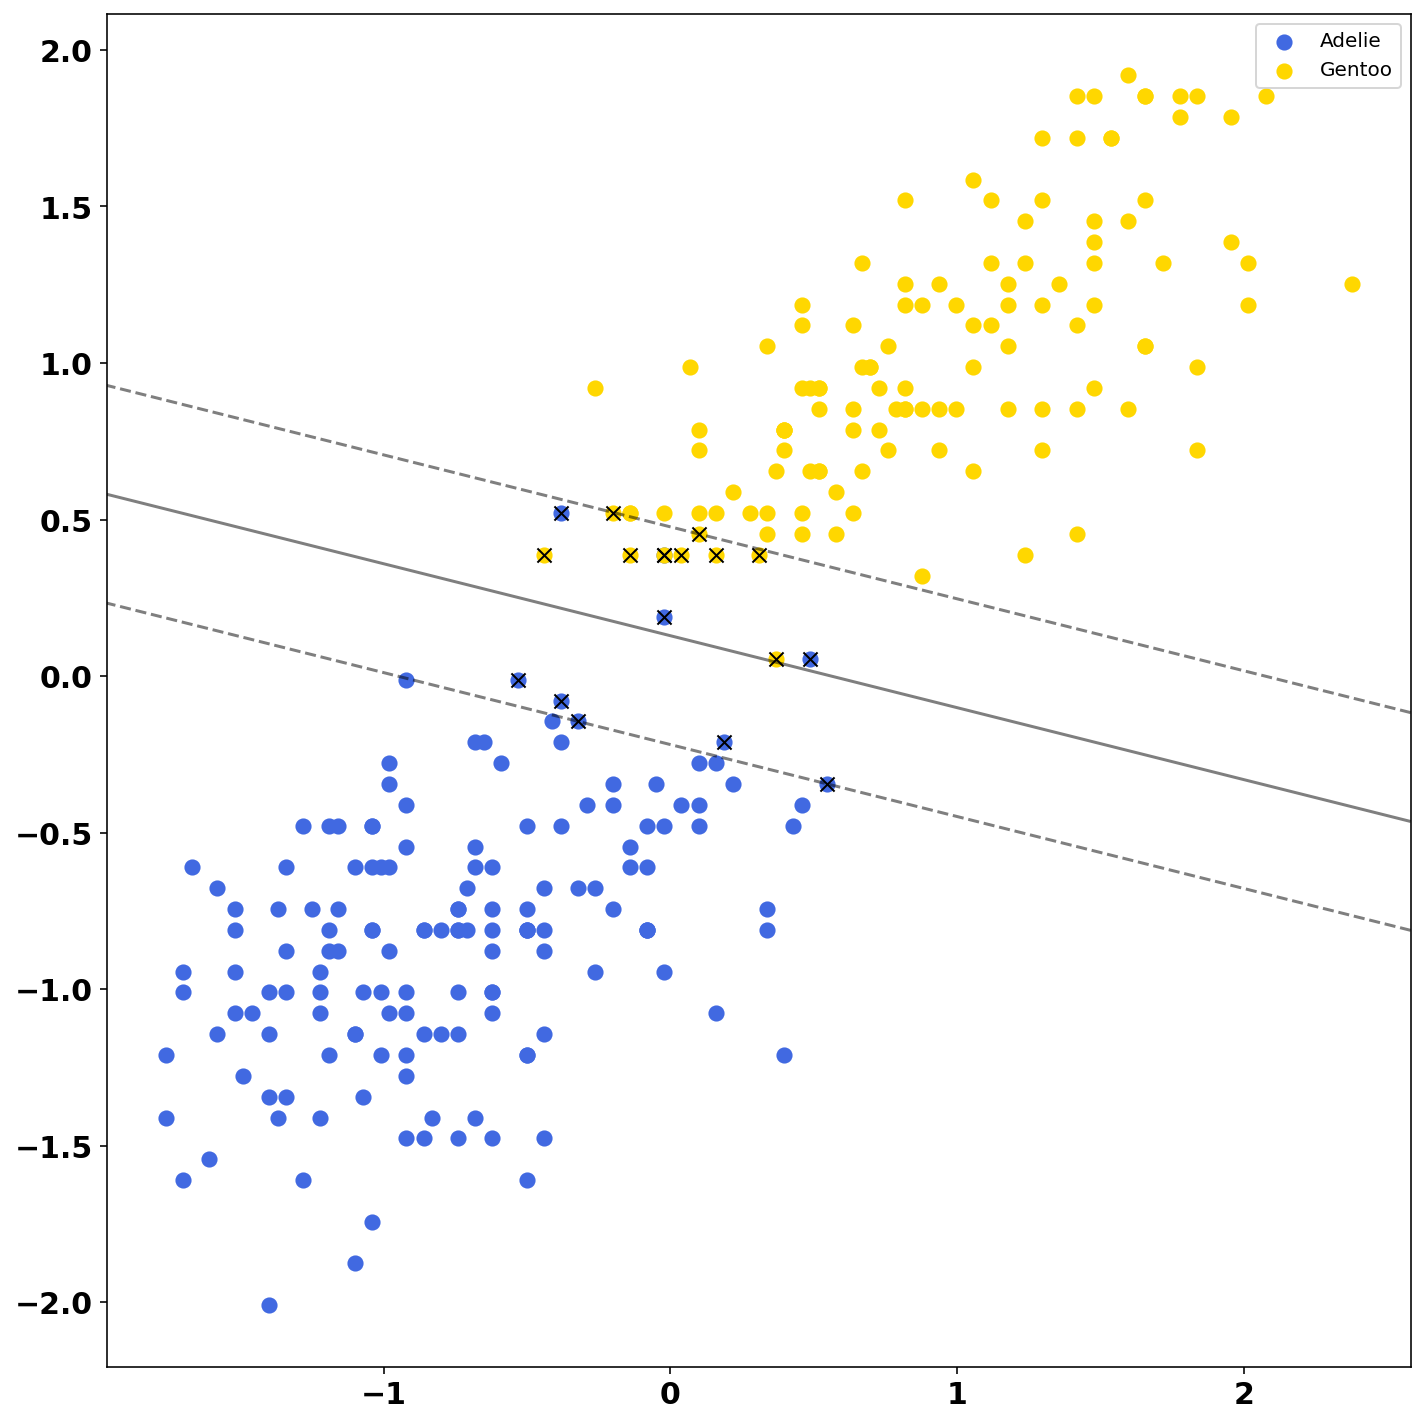

In [17]:
plt.figure(figsize=(10, 10))

# plot the point cloud
adelie = plt.scatter(data_scaled[np.where(penguins_labels["species_int"]==0),0], 
                    data_scaled[np.where(penguins_labels["species_int"]==0),1], 
                    color="royalblue", 
                    s=50, 
                    label = 'Adelie',
                    cmap=plt.cm.Paired)

gentoo = plt.scatter(data_scaled[np.where(penguins_labels["species_int"]==2),0], 
                    data_scaled[np.where(penguins_labels["species_int"]==2),1], 
                    color="gold", 
                    s=50, 
                    label = 'Gentoo',
                    cmap=plt.cm.Paired)

plt.legend()

# get frame limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], 
           clf.support_vectors_[:, 1], 
           s=50, 
           linewidth=1, 
           marker='x', 
           color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])

# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

In [18]:
print(clf.score(data_scaled, labels))

0.9854014598540146


### Q2.

__Question :__ What is the effect of feature standardisation on the performance of the classifier? How can you interpret it?

__Answer :__ The feature standardization allows a better performance of the classifier. If there is a large difference between two features, one feature will "count" much more than the other when calculating similarities. By standardising, the features will be brought to the same scale and there will be no more bias when calculating similarities.

For the rest of the tutorial, we will therefore standardise all the features.

In [19]:
std_scale = preprocessing.StandardScaler().fit(penguins_features)
penguins_features_scaled = pd.DataFrame(std_scale.transform(penguins_features), columns=penguins_features.columns)

### 3. Perfect case

This time we will look at the features **bill_length_mm** and **bill_depth_mm**.

In [20]:
# Select the 2 features
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,2])] 
data = np.array(data[["bill_length_mm","bill_depth_mm"]])
print("X shape:", data.shape)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,2])]
labels = np.array(labels["species_int"])
print("y shape:", labels.shape)

# initialize a model
clf = svm.SVC(kernel='linear', C=10000)

# fit the model
clf.fit(X= data, y = labels)

X shape: (274, 2)
y shape: (274,)


SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

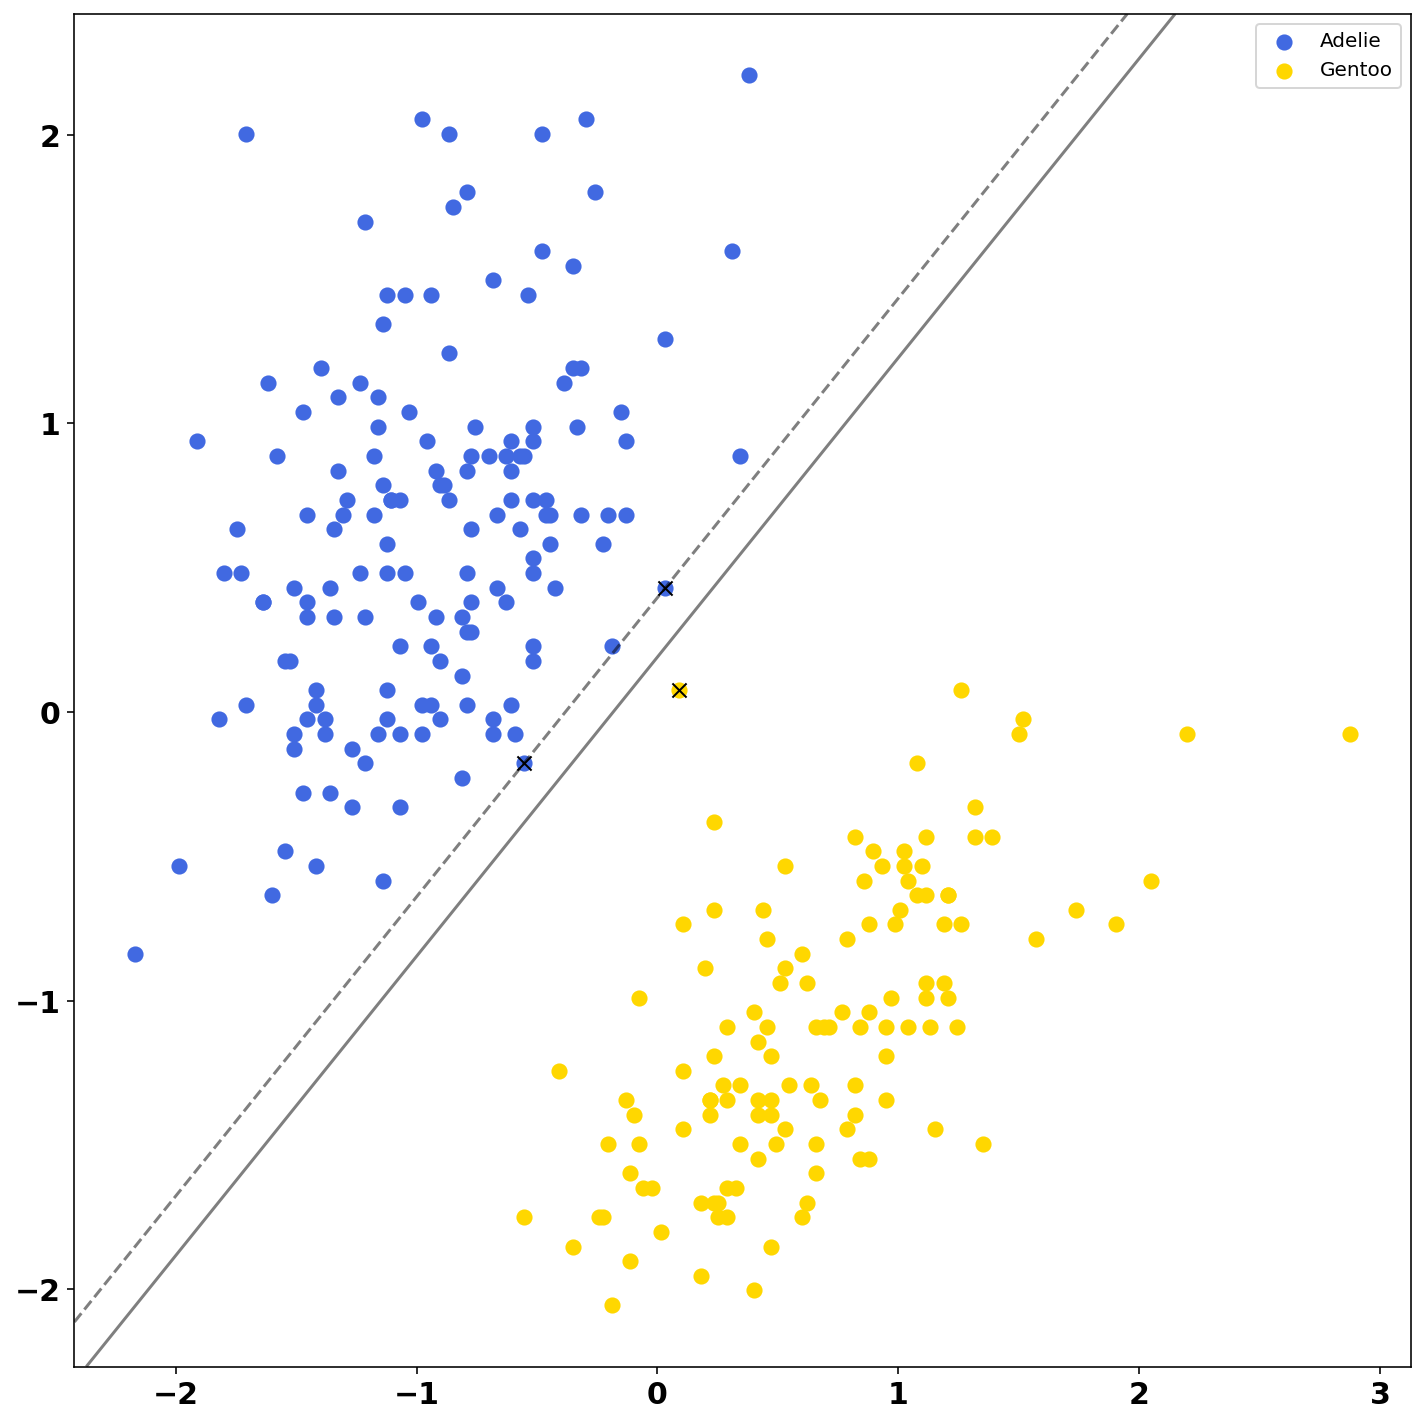

In [21]:
plt.figure(figsize=(10, 10))

# plot the point cloud
adelie = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==0]['bill_length_mm'], 
                     penguins_features_scaled[penguins_labels["species_int"]==0]['bill_depth_mm'], 
                    color="royalblue", 
                    s=50, 
                    label = 'Adelie',
                    cmap=plt.cm.Paired)

gentoo = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==2]['bill_length_mm'], 
                    penguins_features_scaled[penguins_labels["species_int"]==2]['bill_depth_mm'], 
                    color="gold", 
                    s=50, 
                    label = 'Gentoo',
                    cmap=plt.cm.Paired)

plt.legend()

# get frame limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
           s=50, linewidth=1, marker='x', color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0], 
           alpha=0.5, linestyles=['--', '-'])

# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

### Q3.

__Question :__ What does a performance of 1.0 mean? Which points are the support vectors? 

__Answer :__ A performance of 1.0 means that the classifier perfectly separates the two groups of observations. We notice that the support vectors are all on the margin of the separating hyperplane. There is no support vector (as defined by sklearn) in the indecision zone.

### 4. Gram matrix representation

The **kernel** can be interpreted as a similarity matrix between different observations. We then rely on the similarity of some observations to be able to classify them. 

We will represent the Gram matrix from the previous classifier. In the case of a linear kernel SVM, it is the scalar product of the features. In order to give you a good feeling of the **similarity** between the observations, ther Gram matrix will be reduced to a matrix with 1s on the diagonal using the *center_an_normalise_kernel()* function.

In [22]:
import math

def center_and_normalise_kernel(K_temp):

    K_temp = preprocessing.KernelCenterer().fit_transform(K_temp)
    nb_item = K_temp.shape[0]
    K_norm = np.zeros((nb_item, nb_item))
    for i in range(nb_item):
        for j in range(i, nb_item):
            K_norm[i, j] = K_temp[i, j] / math.sqrt(K_temp[i, i] * K_temp[j, j])
            K_norm[j, i] = K_norm[i, j]

    return K_norm

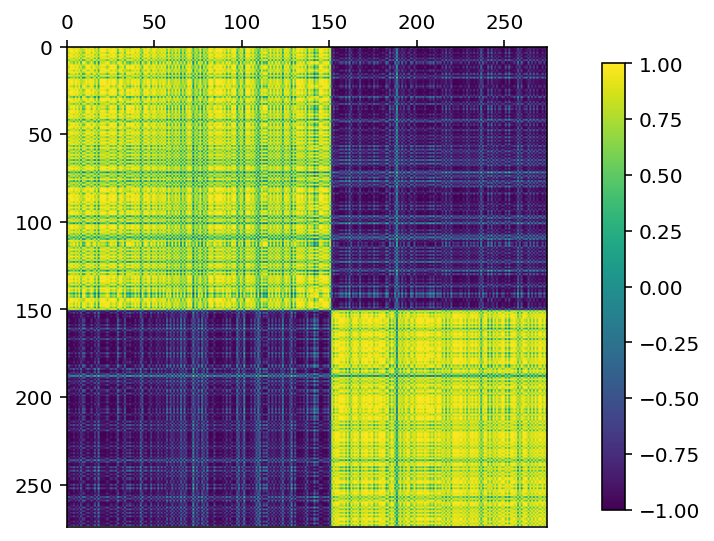

In [23]:
GramMatrix = np.inner(data, data)
GramMatrix_scaled = center_and_normalise_kernel(GramMatrix)

# heatmap + color map
fig, ax = plt.subplots(figsize=(5, 5))
plot = ax.imshow(GramMatrix_scaled) 

# set axes boundaries
ax.set_xlim([0, data.shape[0]]) ; ax.set_ylim([0, data.shape[0]])

# flip the y-axis
ax.invert_yaxis() ; ax.xaxis.tick_top()

# plot colorbar to the right
plt.colorbar(plot, pad=0.1, fraction=0.04)

### Q4.a

__Question:__ What do you notice? Could you have anticipated that the classifier "separates" well by looking at the Gram matrix?

__Answer:__ From the observation 0 to 151, the matrix values (the *similarities*) are close to 1 with each other while they are close to -1 with the second group (from observation 152 to 273) and vice versa. The two groups of labels are easily discernible by looking at the similarity matrix alone, so we can assume that the classifier will be able to "separate" them easily.

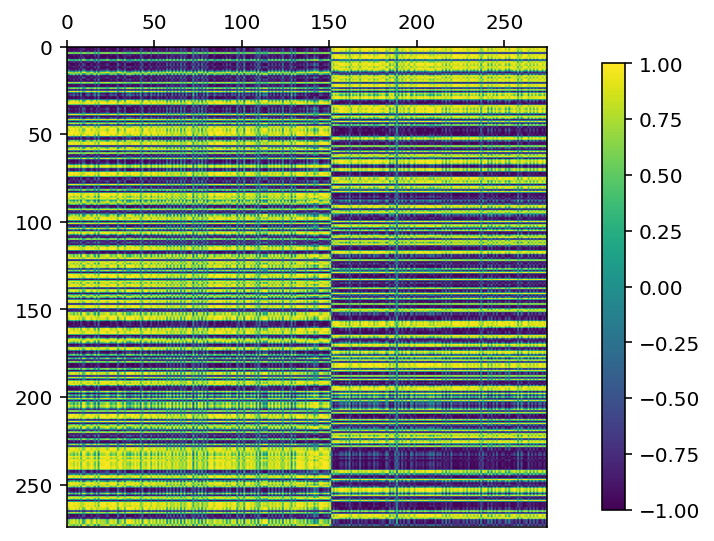

In [24]:
GramMatrix = np.inner(data, data)
GramMatrix_scaled = center_and_normalise_kernel(GramMatrix)

r = GramMatrix.shape[0]
pr = np.random.permutation(np.arange(r))


# heatmap + color map
fig, ax = plt.subplots(figsize=(5, 5))
plot = ax.imshow(GramMatrix_scaled[pr,:]) 

# set axes boundaries
ax.set_xlim([0, data.shape[0]]) ; ax.set_ylim([0, data.shape[0]])

# flip the y-axis
ax.invert_yaxis() ; ax.xaxis.tick_top()

# plot colorbar to the right
plt.colorbar(plot, pad=0.1, fraction=0.04)

### Q4.b

__Question:__ What do you observe? What should we look out for when we observe a Gram matrix?

__Answer:__ Observing the Gram matrix is only helpful when the labels are ordered.

### 5. A slightly more complicated case

Now consider the two species: **Adelie (0)** and **Chinstrap (1)** and the features *body_mass_g* and *bill_depth_mm*.

In [25]:
# Select the 2 features
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,1])] 
data = np.array(data[["bill_depth_mm", "body_mass_g"]])
print("X shape:", data.shape)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,1])]
labels = np.array(labels["species_int"])
print("y shape:", labels.shape)

# initialize a model
clf = svm.SVC(kernel='linear', C=10)

# fit the model
clf.fit(X= data, y = labels)

X shape: (219, 2)
y shape: (219,)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

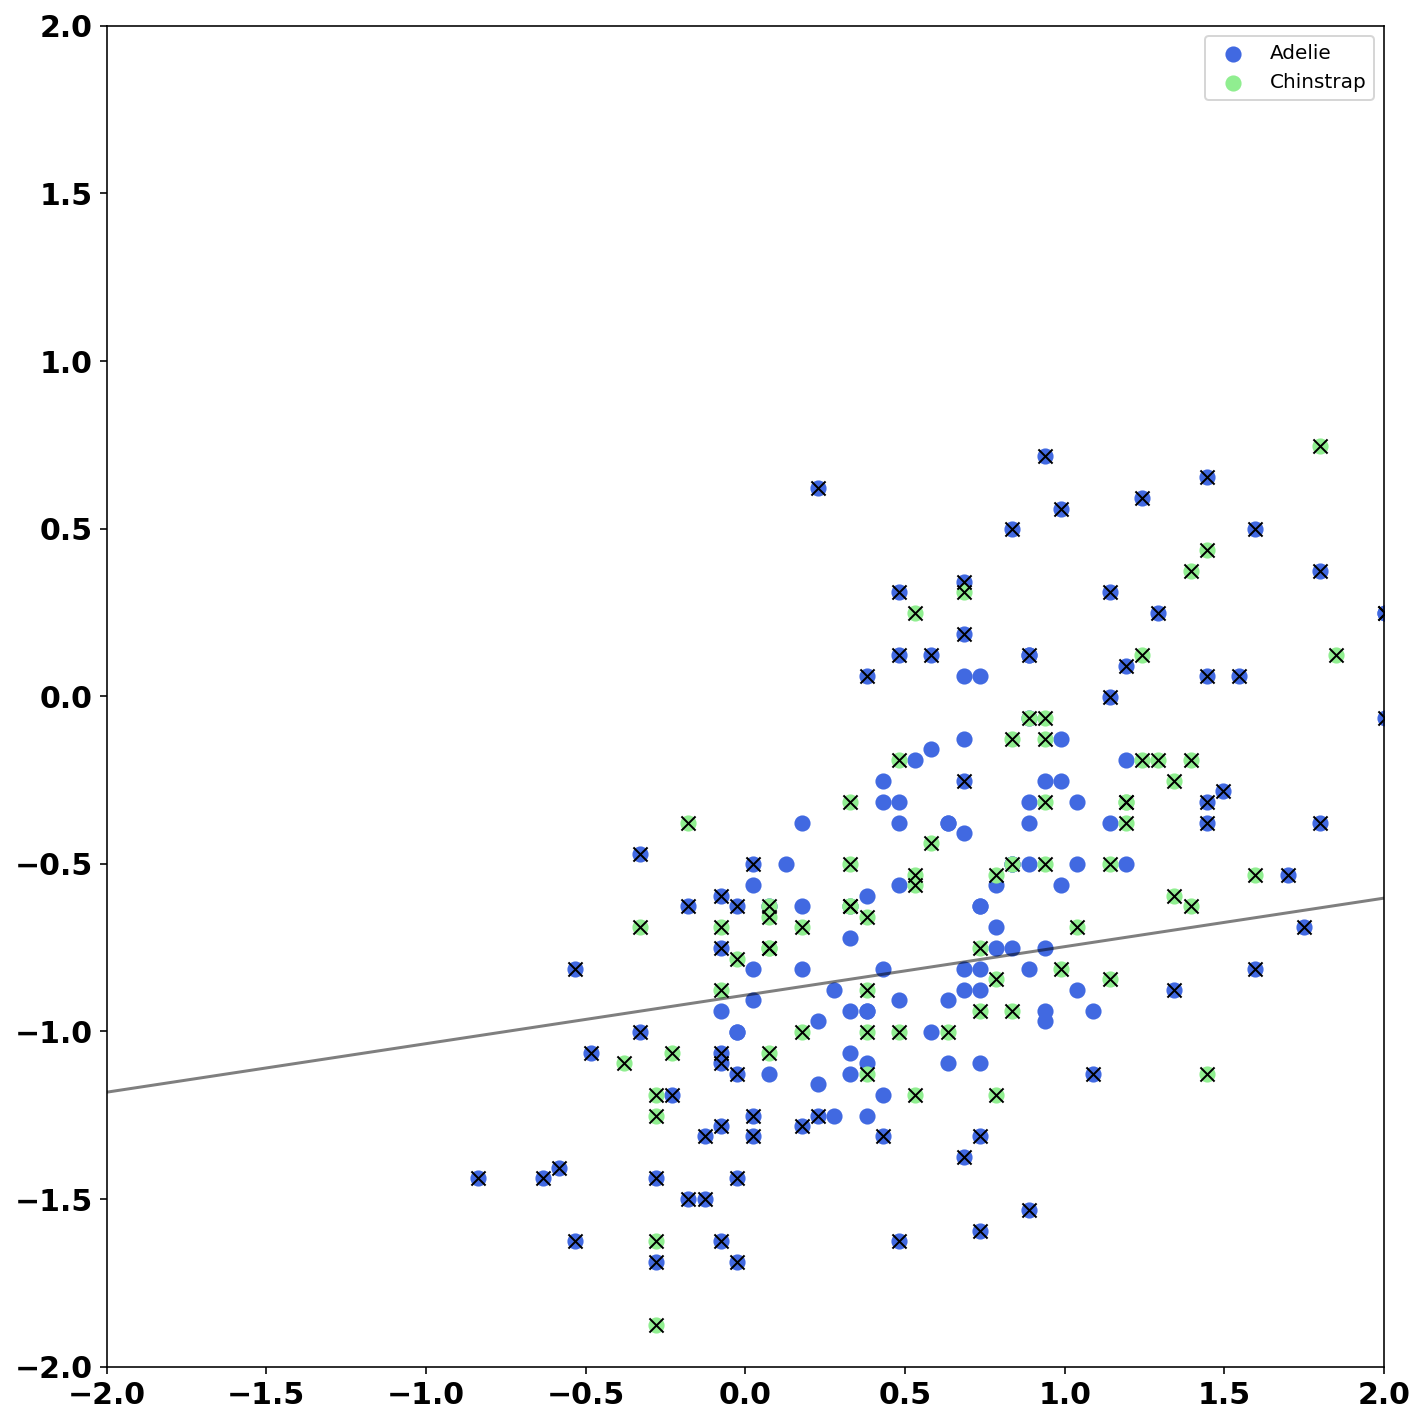

In [39]:
plt.figure(figsize=(10, 10))

# plot the point cloud
adelie = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==0]['bill_depth_mm'], 
                     penguins_features_scaled[penguins_labels["species_int"]==0]['body_mass_g'], 
                    color="royalblue", 
                    s=50, 
                    label = 'Adelie',
                    cmap=plt.cm.Paired)

gentoo = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==1]['bill_depth_mm'], 
                    penguins_features_scaled[penguins_labels["species_int"]==1]['body_mass_g'], 
                    color="lightgreen", 
                    s=50, 
                    label = 'Chinstrap',
                    cmap=plt.cm.Paired)



plt.legend()

# get frame limits
ax = plt.gca()

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], 
           clf.support_vectors_[:, 1], 
           s=50, 
           linewidth=1, 
           marker='x', 
           color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, 
           YY, 
            Z,
           colors='k', 
           levels=0, 
           alpha=0.5, linestyles=[ '--','-'])


# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

In [47]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (clf.intercept_[0]) / w[1]

In [48]:
# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

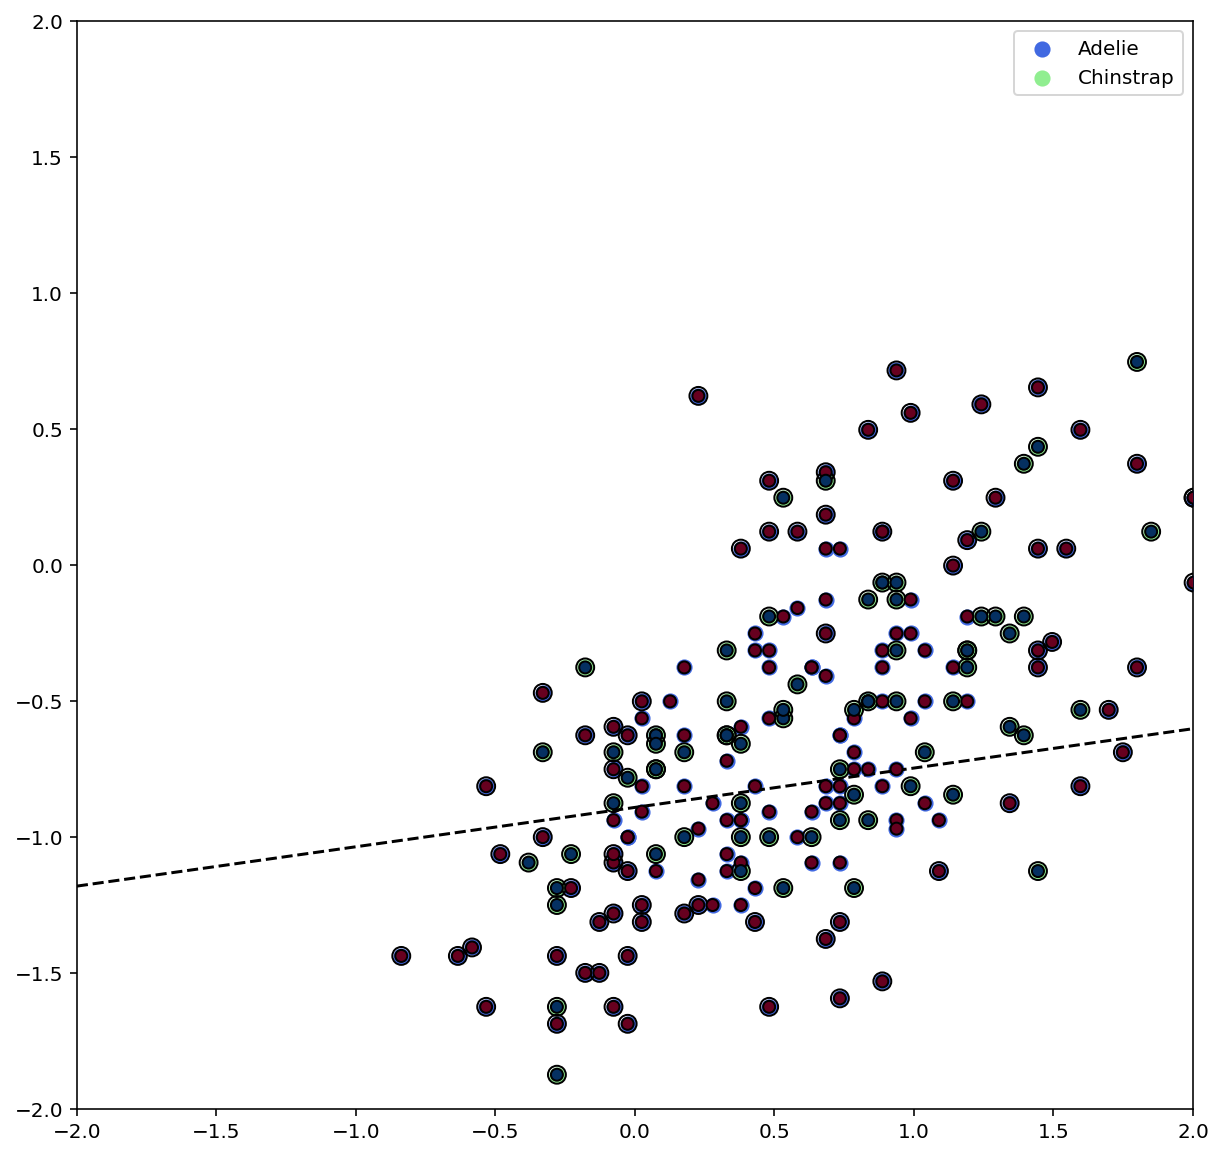

In [56]:
from matplotlib import cm

plt.figure(figsize=(10, 10))

# plot the point cloud
adelie = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==0]['bill_depth_mm'], 
                     penguins_features_scaled[penguins_labels["species_int"]==0]['body_mass_g'], 
                    color="royalblue", 
                    s=50, 
                    label = 'Adelie',
                    cmap=plt.cm.Paired)

gentoo = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==1]['bill_depth_mm'], 
                    penguins_features_scaled[penguins_labels["species_int"]==1]['body_mass_g'], 
                    color="lightgreen", 
                    s=50, 
                    label = 'Chinstrap',
                    cmap=plt.cm.Paired)



plt.legend()

# get frame limits
ax = plt.gca()

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross

plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=cm.get_cmap("RdBu"),
    )

plt.scatter(
        data[:, 0], data[:, 1], c=labels, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
)
# ax.scatter(clf.support_vectors_[:, 0], 
#            clf.support_vectors_[:, 1], 
#            s=50, 
#            linewidth=1, 
#            marker='x', 
#            color='k')

plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Put the result into a contour plot
plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

plt.show()

In [46]:
xy

array([[-2.        , -2.        ],
       [-2.        , -1.86206897],
       [-2.        , -1.72413793],
       ...,
       [ 2.        ,  1.72413793],
       [ 2.        ,  1.86206897],
       [ 2.        ,  2.        ]])

With graphics, it is really not easy to separate the two species with a line.

### Q5.a

__Question:__ How well does this model perform? What does the algorithm predict?

__Answer:__

In [27]:
print(clf.score(data, labels))

0.6894977168949772


Represent the Gram matrix

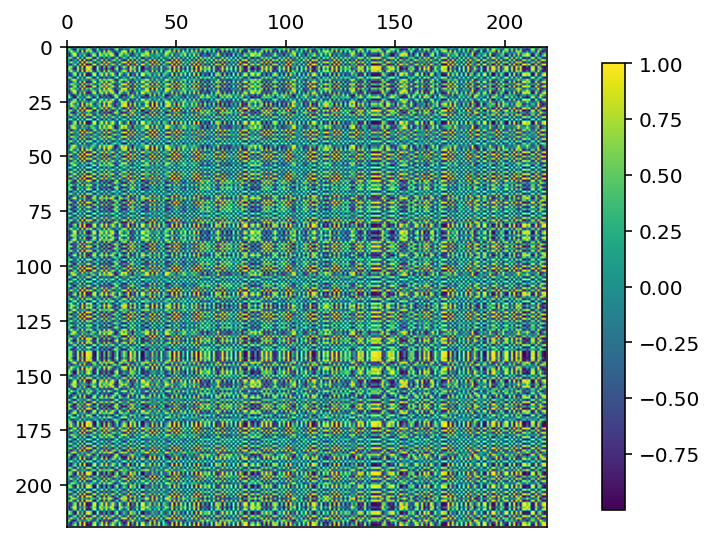

In [28]:
GramMatrix = np.inner(data, data)
GramMatrix_scaled = center_and_normalise_kernel(GramMatrix)

# heatmap + color map
fig, ax = plt.subplots(figsize=(5, 5))
plot = ax.imshow(GramMatrix_scaled) 

# set axes boundaries
ax.set_xlim([0, data.shape[0]]) ; ax.set_ylim([0, data.shape[0]])

# flip the y-axis
ax.invert_yaxis() ; ax.xaxis.tick_top()

# plot colorbar to the right
plt.colorbar(plot, pad=0.1, fraction=0.04)

### Q5.b

__Question :__ What do you observe?

__Answer :__ We find no particular pattern, contrary to the previous case, while the lables are also classified. We can then understand why the linear kernel does not allow a simple classification in this particular case.

Maybe it would make more sense to look at other features to separates the two classes 0 and 1.

In [29]:
penguins_adelie_chinstrap = pd.concat([penguins_features[penguins_labels["species_int"].isin([0,1])],
                                    penguins_labels[penguins_labels["species_int"].isin([0,1])]],
                                     axis = 1)

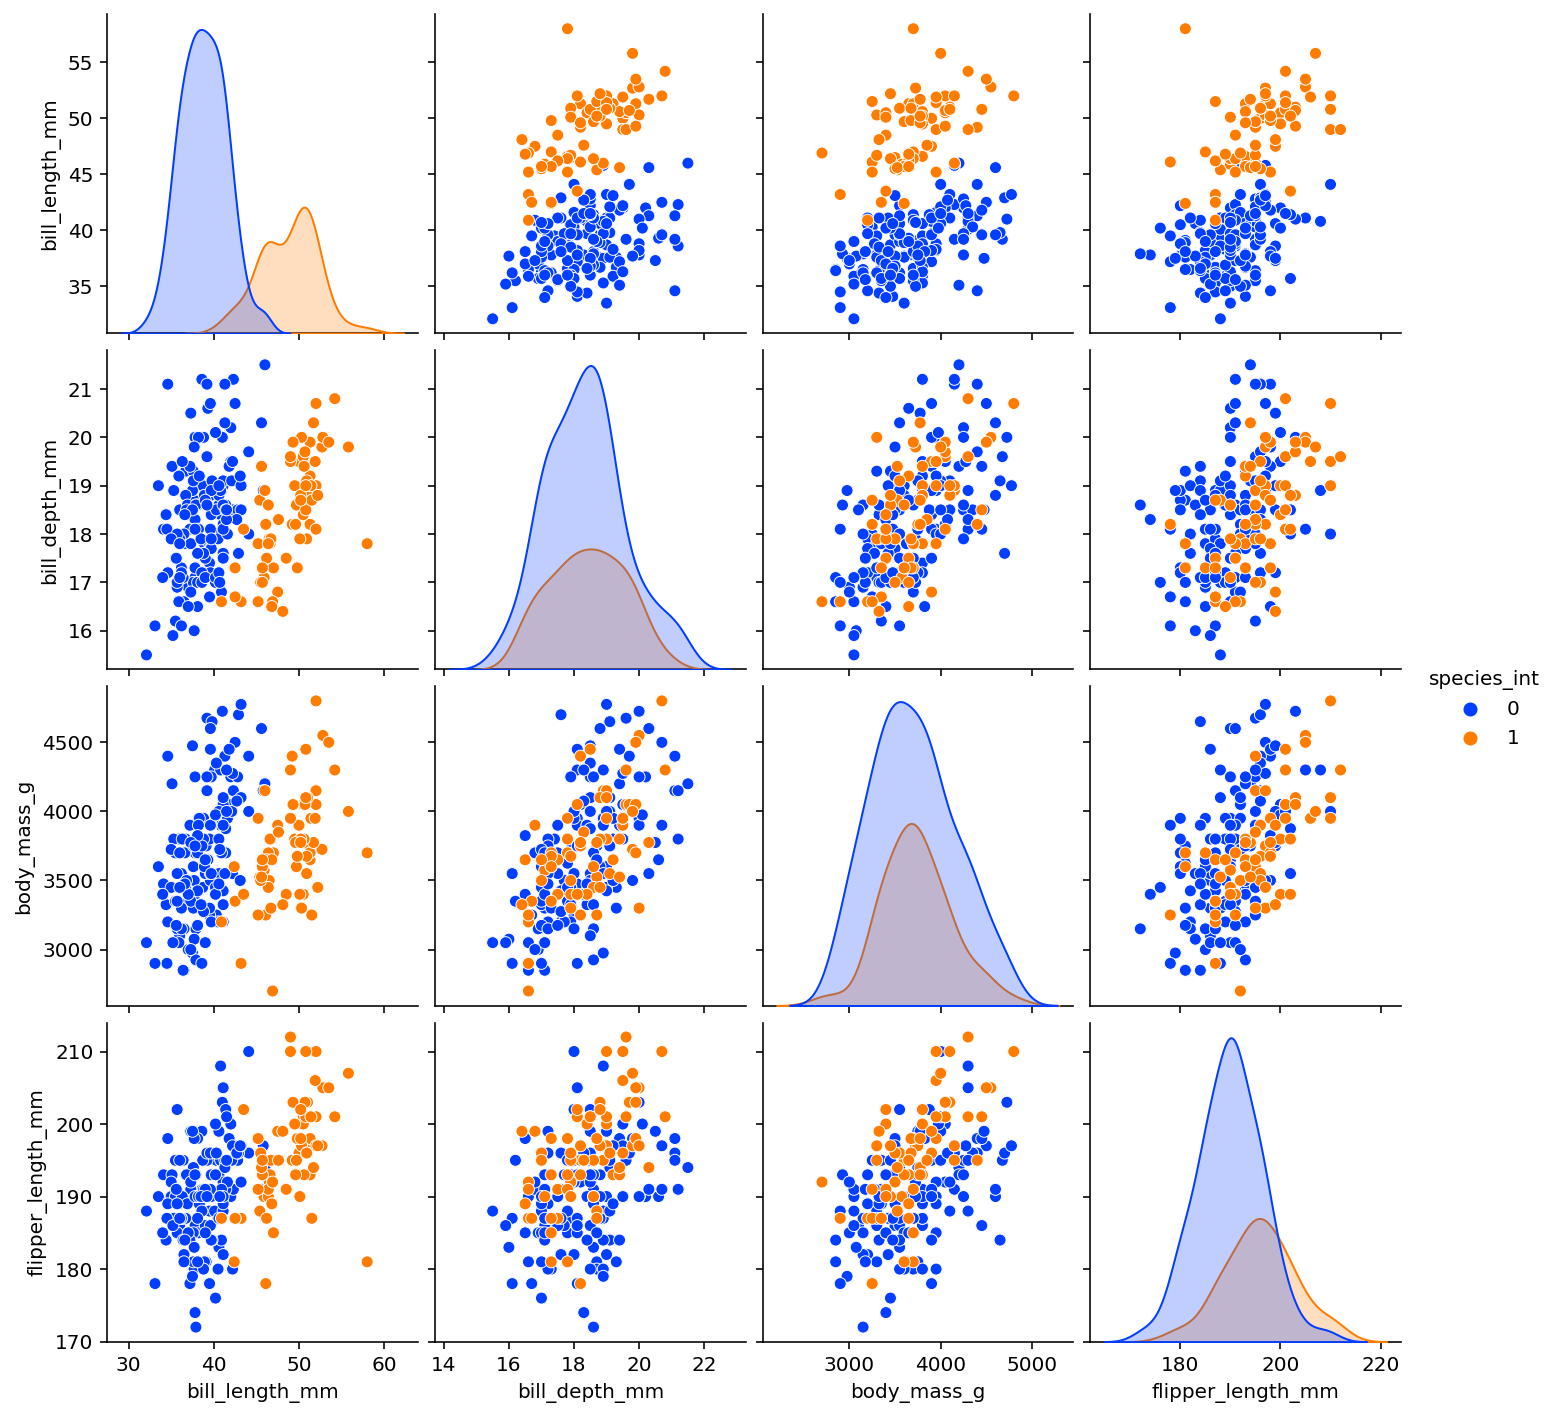

In [30]:
import seaborn as sns
sns.pairplot(penguins_adelie_chinstrap, hue="species_int",palette="bright")

### Q5.c

__Question :__
Which pair(s) of features could be used to have a better separation of these two classes?

__Answer :__

Repeat the steps in III.5. for this pair of features

In [ ]:
# Answer

## IV. SVM with  non-linear kernel

### 1. RBF kernel

We will use an **RBF** (for **radial basis function**) kernel, for several values of the gamma parameter. In lecture the formula of the Gaussian kernel (or RBF kernel) with the sigma paramater was given to you:

\begin{align}
k(x, x') = \exp\bigg[-\frac{||x - x'||^2}{2 \sigma^2}\bigg]
\end{align}

Another definition involves the gamma parameter, $\gamma=\frac{1}{2 \sigma^{2}}$ : 

\begin{align}
k(x,x')=\exp\bigg[(-\gamma\||x - x'||^2\bigg]
\end{align}

### Q6.

__Question :__ What is the gamma parameter in the RBF kernel formula?

__Answer :__

Let's test different values of gamma.

In [ ]:
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,1])] 
data = np.array(data[["bill_depth_mm", "bill_length_mm"]])

labels = penguins_labels[penguins_labels["species_int"].isin([0,1])]
labels = np.array(labels["species_int"])

# gamma values
gamma_range = np.linspace(0.01, 200, 20)

for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=0.7, gamma=param)
    clf.fit(data, labels)
    score = clf.score(data, labels)
    print("gamma: {0:.2f} | score: {1:.2f}".format(param, score))

### Q7.

__Question :__ What gamma value would we be tempted to take to get a better model?

__Answer :__

### 2. Generalization

Does this model **generalise** well, i.e. will it be able to make good predictions on new, previously unseen data? 

To find out, we will separate the data into a __training set__ and a __test set__. The test set, being unknown at the time of training the model, is new data. For this we will use the function [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) of scikit-learn.

We need to (1) do the split on the unstandardized features, then (2) standardize the training set, and finally (3) standardize the test set according to the variance and the mean of the training set features.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split the dataset between train and test
data = penguins_features[penguins_labels["species_int"].isin([0,1])] 
data = np.array(data[["bill_depth_mm", "bill_length_mm"]])

labels = penguins_labels[penguins_labels["species_int"].isin([0,1])]
labels = np.array(labels["species_int"])

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=.2, 
                                                    random_state=21)

In [ ]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

In [ ]:
# test the performance for different values of gamma
acc_train, acc_test = list(), list()
gamma_range = np.linspace(0.01, 200, 20)
for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=0.7, gamma=param)
    clf.fit(X_train_scaled, y_train)
    acc_train.append(clf.score(X_train_scaled, y_train))
    acc_test.append(clf.score(X_test_scaled, y_test))

Plot the performance against the tested gamma values.

In [ ]:
plt.figure(figsize=(10, 5))

# plot train and test scores for different gamma values
plt.plot(gamma_range, acc_train, label='train set', lw=4)
plt.plot(gamma_range, acc_test, label='test set', lw=4)

# add a legend
plt.legend(loc='best', fontsize=12)

# format the plot
plt.xlabel("Gamma", fontweight="bold", fontsize=20)
plt.ylabel("Performance", fontweight="bold", fontsize=20)
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

### Q8.

__Question :__ Do you observe a situation of overfitting? Where ? 

__Answer :__ 

The graph above makes us want to take a value of around 10 for the gamma parameter. But be careful ! If we take the parameter that works best on the test dataset, we may also overfit : we will then have used the test set to choose the best model, in other words, we will have "seen" the so-called "unknown data" during the learning phase (training)...

To avoid this, we msut make a __cross-validation__ on the training set.

Let's examine the performance by varying the parameters *gamma* and *C*. We will use the [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class of the *model_selection* module of scikit-learn.

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# define a set of parameter to test
parameters = {'gamma':[ 1, 10, 20, 50], 
             'C':[0.5, 0.7,1]}

# initialize a model
svc = svm.SVC(kernel='rbf')

# initialize cross validation
clf = GridSearchCV(estimator=svc, 
                   param_grid=parameters,
                   cv=5)

# run the cross validation using train dataset
clf.fit(X_train_scaled, y_train)

In [ ]:
plt.figure(figsize=(10, 3))

# format results from gridsearch
scores = clf.cv_results_['mean_test_score'].reshape(len(parameters['gamma']), len(parameters['C']))
print(scores)

# plot performance scores
# plt.imshow(scores, interpolation='none')
plt.imshow(scores, interpolation='none', cmap="RdBu_r")

# add a colorbar
plt.colorbar()

# format the plot
plt.title("Score", fontweight="bold", fontsize=20)
plt.xlabel("C", fontweight="bold", fontsize=18)
plt.ylabel("Gamma", fontweight="bold", fontsize=18)
plt.ylim((-0.5, 3.5))
plt.xticks(np.arange(len(parameters['C'])), parameters['C'], fontsize=15)
plt.yticks(np.arange(len(parameters['gamma'])), parameters['gamma'], rotation=90, fontsize=15)
plt.tight_layout()

plt.show()

### Q9.

__Question :__ What is the role of parameter C? What do you observe when C is big?  

__Answer :__

### Q10.

__Question :__ Finally, what values of C and gamma will you take?

__Answer :__ 

## Application

Select the best SVM parameters for classification with the 4 features (*bill_depth_mm*,  *bill_length_mm*, *flipper_length_mm* and *body_mass_g*).

__Question :__ Train a classification SVM to separate the species on the two problems (Adelie vs Gentoo, then Adelie vs Chinstrap). Train your SVM in cross-validation on the training set. What parameters can you vary? What is the performance of your optimal model _on the test set_? 

### 1) Adelie (0) vs Gentoo (2)

In [ ]:
# Answer

### 2) Adelie (0) vs Chinstrap (1)

In [ ]:
# Answer

### Bonus question

__Question :__ How to build a multi-class SVM model that assigns a new observation to one of the three species Adelie (0), Chinstrap (1) or Gentoo (2)?

__Answer :__